In [1]:
import pytesseract
from pdf2image import convert_from_path
import cv2
import os


pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
tessdata_dir_config = '--tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata"'

ModuleNotFoundError: No module named 'pytesseract'

In [ ]:
# converts pdf to list of images
def pdf_to_img(pdf):
    pdf_pages = convert_from_path(pdf, dpi=350, poppler_path=r'C:\Program Files\poppler-0.68.0\bin')
    i = 1
    img_list = []
    for page in pdf_pages:
        page.save('images/page' + str(i) + '.jpg', 'JPEG')
        img_list.append('page' + str(i) + '.jpg')
#         print('img_list',img_list)
        i += 1
    print('PDF to Image Conversion Successful!')
    return img_list

In [ ]:
# each image is processed, contours are plotted and sorted
def bounding_boxes(img_list, show_boxes):
    boxes = {}
    for curr_img in img_list:
#         print("aaa", curr_img)
        img = cv2.imread('images/'+curr_img)
#         print("iii", img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, ksize=(9, 9), sigmaX=0)
        # _, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
        thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 30)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
        dilate = cv2.dilate(thresh, kernel, iterations=4)
        contours, _ = cv2.findContours(dilate, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

        temp = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            # print(x, y, w, h)
            if cv2.contourArea(contour) < 10000:
                continue
            temp.append([x, y, w, h])
            if show_boxes:
                cv2.rectangle(img, (x, y), (x + w, y + h), color=(255, 0, 255), thickness=3)
        if show_boxes:
            img = cv2.resize(img, (500, 700), interpolation=cv2.INTER_AREA)
            st.image(image=img, caption=curr_img)
            # cv2.imshow(curr_img, img)
            # cv2.waitKey(0)
        boxes[curr_img] = temp
        
    print('Contours saved Successfully!')
    return boxes

In [ ]:
# text is extracted from each contours stored
def extract_text(boxes):
#     print('bbb', boxes)
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    text = ''
    for key in boxes:
#         print("kkk", key)
        img = cv2.imread('images/'+ key)
        for x, y, w, h in boxes[key]:
            cropped_image = img[y:y + h, x:x + w]
            _, thresh = cv2.threshold(cropped_image, 127, 255, cv2.THRESH_BINARY)
            text += str(pytesseract.image_to_string(thresh, config=tessdata_dir_config))
    print('Text Extraction Completed!')
    return text

In [ ]:
# base function
def ocr(filename, show_boxes):
    if filename:
        img_list = pdf_to_img(filename)
        # print(img_list)
        boxes = bounding_boxes(img_list, show_boxes)
        if not show_boxes:
            text = extract_text(boxes)
            # text = 'hii'
            return text
    else:
        st.warning('Please select a PDF file!')

In [ ]:
filename = r"E:\pdf_extraction\pdfs\basic-understanding-of-a-companys-financials.pdf"

a = ocr(filename, 0)

In [ ]:
a

# Text Summarization using BERT

In [ ]:
!pip install tensorflow

In [ ]:
# !pip install transformers==2.2.0
# !pip install bert-extractive-summarizer

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
bert_model = Summarizer()
bert_summary = ''.join(bert_model(body, min_length=60))
print(bert_summary)

# Text Summarization using Spacy

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [ ]:
# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_sm

In [ ]:
def summarize(text, per):
    text = text.replace("\n", '')
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [ ]:
summarize(a, 0.05)

# Summarization using Gensim

source = https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/

In [ ]:
# !pip install gensim==3.4.0

In [ ]:
# Importing package and summarizer
import gensim
from gensim.summarization import summarize

In [ ]:
# Passing the text corpus to summarizer
text = a.replace('\n','')
short_summary = summarize(text)
print(short_summary)

In [ ]:
# Summarization by ratio

summary_by_ratio=summarize(text,ratio=0.1)
print(summary_by_ratio)

# Preprocessing text 

In [2]:

def read_text(path):
    with open(path,'r',encoding='utf8') as f:
        text=f.read().replace('\\n','')
    return text

path='./input_text/text.txt'
text=read_text(path)
print(text)

'PwC | Basic Understanding of a Company\'s FinancialsCashflow statement24Income statementBalance sheetWhat are financial statements?contentsPwC | Basic Understanding of a Company\'s FinancialsSource CFIThe cash flow statement look at the cash position of the company .It answers it answers the questions ; How much of the organisation’scash goes to its creditors and shareholders? Does it keep enough forits own investment and growth? has 3 components cash fromoperations, cash used in investing, and cash from financing. It“undoes” all of the accounting principles and shows the cash flows ofthe business.Statement of operation/profit and lossThe income statement covers a period of time, such as a quarter oryear. It illustrates the profitability of the company from an accounting(accrual and matching) perspective. It starts with the revenue line andafter deducting expenses derives net income.Statement of financial positionBalance Sheet is a snapshot at a point in time. On the top half youhave 

In [3]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
stopword_list = nltk.corpus.stopwords.words('english')
lemmitizer = WordNetLemmatizer()

In [4]:
lem = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = text.strip()
    text = text.replace("\n", '')
#     text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = text.translate(str.maketrans('','',string.punctuation))
    words = word_tokenize(text)
    text = [w for w in words if w not in stopword_list]
    text = [lem.lemmatize(word) for word in text]
    return text

cleaned_text = preprocess(text)

In [5]:
cleaned_text

['pwc',
 'basic',
 'understanding',
 'company',
 'financialscashflow',
 'statement24income',
 'statementbalance',
 'sheetwhat',
 'financial',
 'statementscontentspwc',
 'basic',
 'understanding',
 'company',
 'financialssource',
 'cfithe',
 'cash',
 'flow',
 'statement',
 'look',
 'cash',
 'position',
 'company',
 'answer',
 'answer',
 'question',
 'much',
 'organisation',
 '’',
 'scash',
 'go',
 'creditor',
 'shareholder',
 'keep',
 'enough',
 'forits',
 'investment',
 'growth',
 '3',
 'component',
 'cash',
 'fromoperations',
 'cash',
 'used',
 'investing',
 'cash',
 'financing',
 '“',
 'undoes',
 '”',
 'accounting',
 'principle',
 'show',
 'cash',
 'flow',
 'ofthe',
 'businessstatement',
 'operationprofit',
 'lossthe',
 'income',
 'statement',
 'cover',
 'period',
 'time',
 'quarter',
 'oryear',
 'illustrates',
 'profitability',
 'company',
 'accountingaccrual',
 'matching',
 'perspective',
 'start',
 'revenue',
 'line',
 'andafter',
 'deducting',
 'expense',
 'derives',
 'net',
 'in

In [6]:
# data = str(cleaned_text)

# Topic Modelling

In [7]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'c:\users\hp\anaconda3\envs\pytorchgpu\python.exe -m pip install --upgrade pip' command.


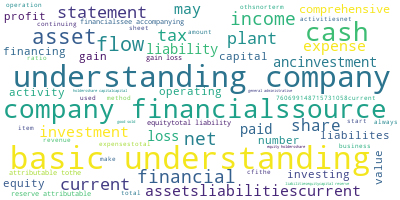

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cleaned_text))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary([cleaned_text])
print(id2word)
# Create Corpus
texts = [cleaned_text]
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

Dictionary(770 unique tokens: ['04729', '048', '04897330641108558117778979commonpreferred', '04897330841108558117778979repayabletotal', '04897330841108558117778979total']...)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [11]:
# for topic_index, topic_summary in lda_model.items():
#     print(topic_summary)
#     st.markdown(f'**Topic {topic_index}**: _{topic_summary}_')

AttributeError: 'LdaMulticore' object has no attribute 'items'

In [12]:
print(lda_model.print_topics())


[(0, '0.016*"company" + 0.011*"understanding" + 0.011*"basic" + 0.010*"financialssource" + 0.009*"cash" + 0.004*"attributable" + 0.004*"loss" + 0.004*"financial" + 0.004*"asset" + 0.004*"gain"'), (1, '0.020*"company" + 0.015*"understanding" + 0.014*"basic" + 0.010*"cash" + 0.008*"financialssource" + 0.006*"asset" + 0.005*"flow" + 0.005*"income" + 0.005*"gain" + 0.005*"net"'), (2, '0.026*"company" + 0.015*"basic" + 0.013*"understanding" + 0.011*"cash" + 0.010*"financialssource" + 0.007*"flow" + 0.006*"income" + 0.006*"asset" + 0.005*"net" + 0.005*"liability"'), (3, '0.030*"company" + 0.016*"understanding" + 0.015*"basic" + 0.010*"financialssource" + 0.009*"cash" + 0.007*"flow" + 0.007*"asset" + 0.006*"liability" + 0.006*"net" + 0.005*"gain"'), (4, '0.024*"company" + 0.017*"understanding" + 0.016*"basic" + 0.015*"cash" + 0.012*"financialssource" + 0.007*"asset" + 0.006*"flow" + 0.006*"net" + 0.006*"tax" + 0.006*"loss"'), (5, '0.018*"company" + 0.011*"basic" + 0.011*"understanding" + 0.01

In [13]:
# !pip install pyLDAvis
# import pyLDAvis
# import pyLDAvis.gensim_models

In [14]:
topics=lda_model.top_topics(corpus)

In [15]:
topics

[([(0.01637338, 'company'),
   (0.011092874, 'understanding'),
   (0.010724766, 'basic'),
   (0.01041564, 'financialssource'),
   (0.00889824, 'cash'),
   (0.004492233, 'attributable'),
   (0.004467795, 'loss'),
   (0.004460341, 'financial'),
   (0.004426668, 'asset'),
   (0.0043283664, 'gain'),
   (0.0043029943, 'statement'),
   (0.004205207, 'tax'),
   (0.004097303, 'current'),
   (0.00403584, 'net'),
   (0.0039781746, 'income'),
   (0.003842609, 'plant'),
   (0.003828221, 'liability'),
   (0.0037906559, 'flow'),
   (0.0037649937, 'equity'),
   (0.0034124139, 'may')],
  1.0000889005818406e-12),
 ([(0.019916974, 'company'),
   (0.014556779, 'understanding'),
   (0.014029026, 'basic'),
   (0.009996743, 'cash'),
   (0.008391446, 'financialssource'),
   (0.0059162905, 'asset'),
   (0.0053715953, 'flow'),
   (0.0052429605, 'income'),
   (0.0047711385, 'gain'),
   (0.0047616255, 'net'),
   (0.0046544033, 'current'),
   (0.0045789047, 'statement'),
   (0.0044369726, 'financial'),
   (0.0043

In [16]:
type(lda_model)

gensim.models.ldamulticore.LdaMulticore

In [17]:
# import pickle
from gensim.test.utils import datapath

# pickle.dump(lda_model,open('lda_pickle','w'))

temp_file = datapath("lda_model")
lda_model.save(temp_file)

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models


C:\Users\HP\anaconda3\envs\Pytorchgpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, 
                              corpus=corpus, 
                              dictionary=id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\HP\anaconda3\envs\Pytorchgpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\HP\anaconda3\envs\Pytorchgpu\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
gensim_models